In [88]:
import pandas as pd

df=pd.read_csv('gs://mit-proyect-data/Base.csv')
data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


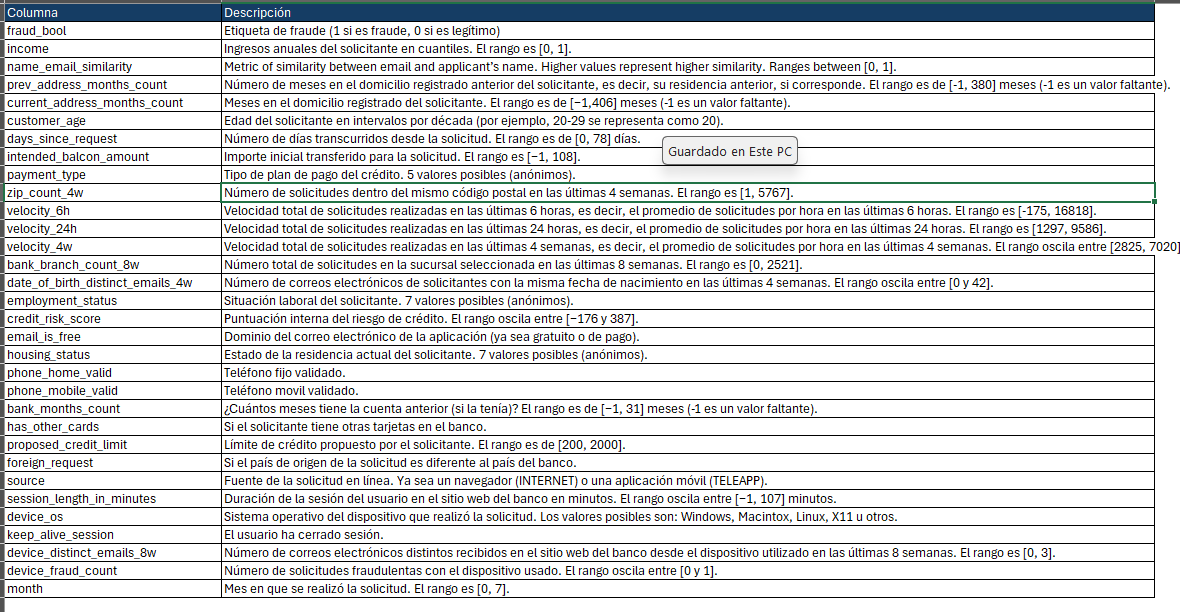

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [90]:
data.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [91]:
data["fraud_bool"].value_counts()


fraud_bool
0    988971
1     11029
Name: count, dtype: int64

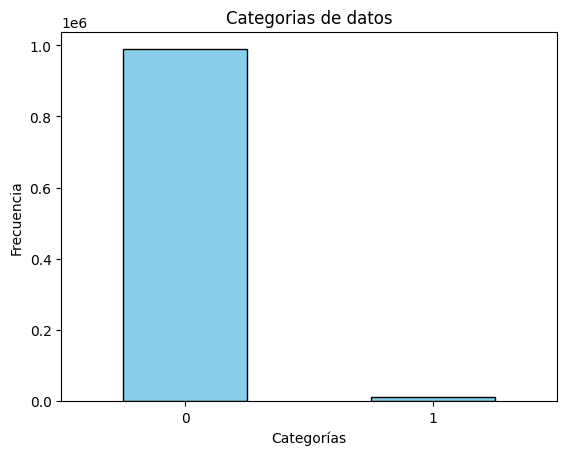

In [92]:
import matplotlib.pyplot as plt
counts = data["fraud_bool"].value_counts()

counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Categorias de datos")
plt.xlabel("Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)  # Mantener etiquetas horizontales
plt.show()

                                  fraud_bool    income  name_email_similarity  \
fraud_bool                          1.000000  0.045079              -0.036720   
income                              0.045079  1.000000              -0.038519   
name_email_similarity              -0.036720 -0.038519               1.000000   
prev_address_months_count          -0.026031  0.018209              -0.018186   
current_address_months_count        0.033701 -0.036985               0.050305   
customer_age                        0.062959  0.125822              -0.048902   
days_since_request                  0.000567 -0.015877              -0.007736   
intended_balcon_amount             -0.024524  0.059046               0.029040   
zip_count_4w                        0.005212 -0.080581               0.025114   
velocity_6h                        -0.016892 -0.096431               0.024881   
velocity_24h                       -0.011183 -0.101269               0.035221   
velocity_4w                 

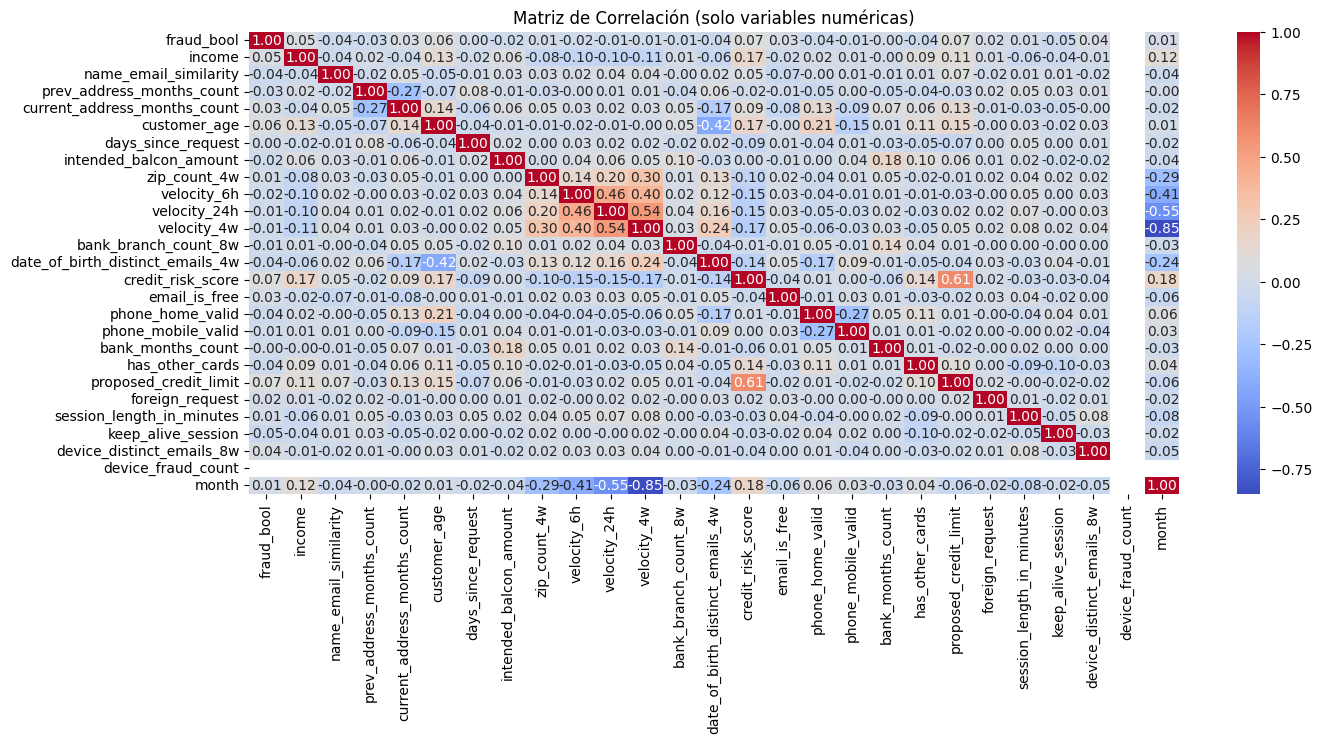

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_num = data.select_dtypes(include=['number'])

corr_matrix = df_num.corr()

print(corr_matrix)

plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación (solo variables numéricas)")
plt.show()

In [94]:
data.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [95]:
data["payment_type"].value_counts()

payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64

array([[<Axes: title={'center': 'prev_address_months_count'}>]],
      dtype=object)

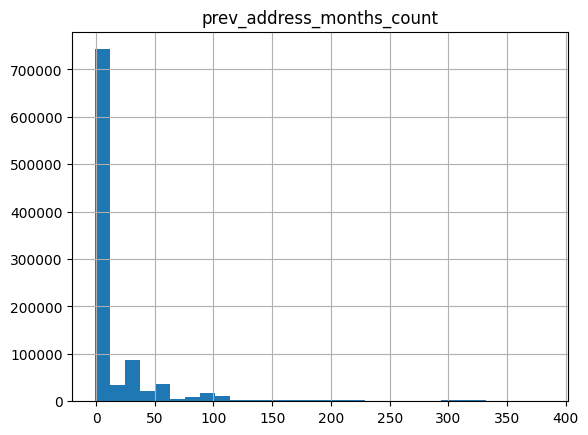

In [96]:
data["prev_address_months_count"].value_counts()
data[["prev_address_months_count"]].hist(bins=30)

In [97]:
conteo_prev1=data[data["prev_address_months_count"]==-1].shape[0]
print(f"total de personas que no regirstraron el domicilio previo {conteo_prev1}")

total de personas que no regirstraron el domicilio previo 712920


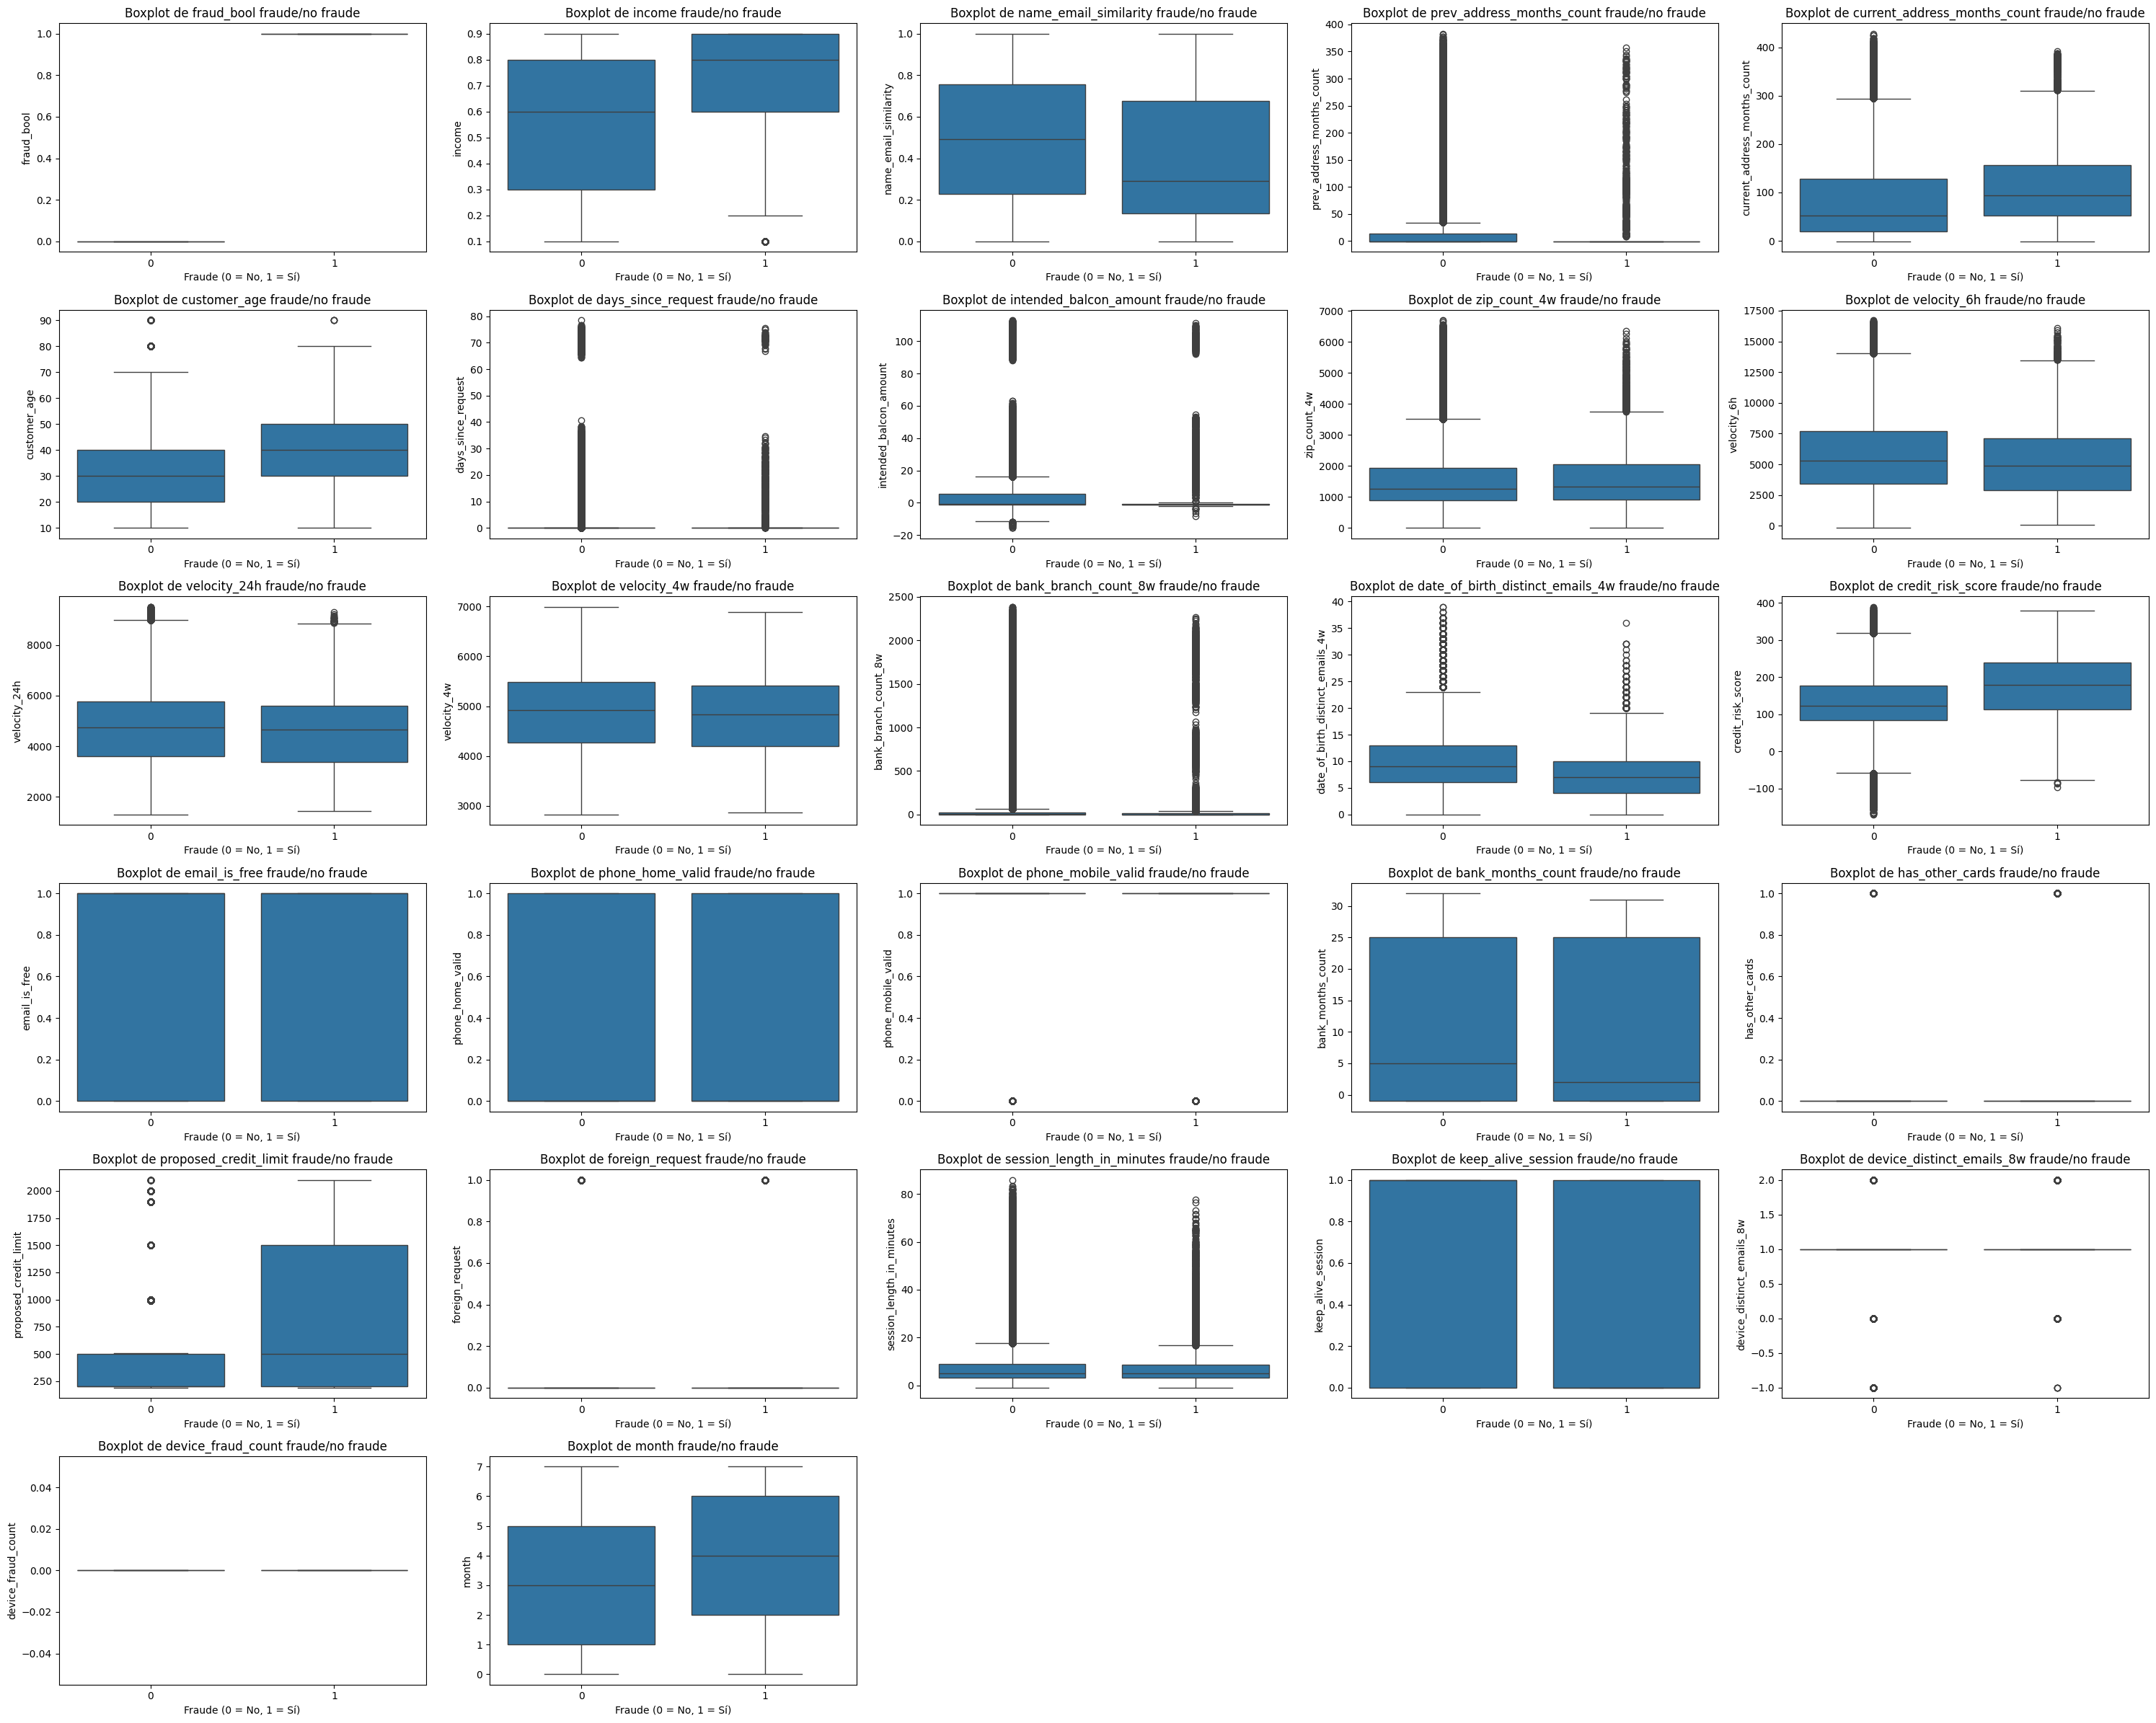

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_numericas = data.select_dtypes(include=['number']).columns


n_cols = 5 
n_rows = (len(columnas_numericas) + n_cols - 1) // n_cols 


fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()  


for i, col in enumerate(columnas_numericas):
    sns.boxplot(x="fraud_bool", y=col, data=data, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col} fraude/no fraude")
    axes[i].set_xlabel("Fraude (0 = No, 1 = Sí)")
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


plt.savefig("boxplots.png", dpi=300, bbox_inches='tight')   # PNG
plt.show()




-Las personas etiquetadas como fraudulentas son aquellas que por lo general tienen un ingreso anual(inconme) mayor con una distribución mayor a partir de >0.6 y mediana 0.8 que los etiquetados como no fraudulentos con una mediana =0.6.

-No se encuentran muchas diferencias entre las personas etiquetadas como fraude o no en la  variable name_email_similarity

-Para la variable pre_adddres_months para ambas etiquetas presenta mucha outliers por locual 
se sugiere eliminarlas 

-Para la variable curreent_address es indistinta para distinguir si es fraude o no

-Para la variable de edad (customer_age) se observa que las etiquetadas como fraudulentas
son aquellas que presentan una mayor edad [30-50] mediana = 40, no fraude [20-40] con mediana=30

-Para las variables velocity_4w , 6hrs, 24hrs presenta un comportamiento igual tanto para los 
casos fraudulentos como no fraudulentos

-Ligera tendencia para decir que los casos no fraudulentos su numero 
de nacimiento coincide con el dato registrado en su correo electrónico (date_of_birth)

-Aquellos con puntuación de riesgo credictio >200  pero menor a < 300 es  probable que sea un caso de fraude
aquellos con puntuación >300 son casos no fraudulentos por lo cual se oberva un problema al asignar esta puntuación
ya que coloca alots puntuación de riesgos a aquellos casos que no son fraudulentos

-Es mas probable que un caso de fraude es aqullea que tienen mayor limte de crédito propuesto
(proposed_credits_limit)

 
-Las solicitudes realizadas en el ultimo mes 6 es mas probable que sea fraude (month)

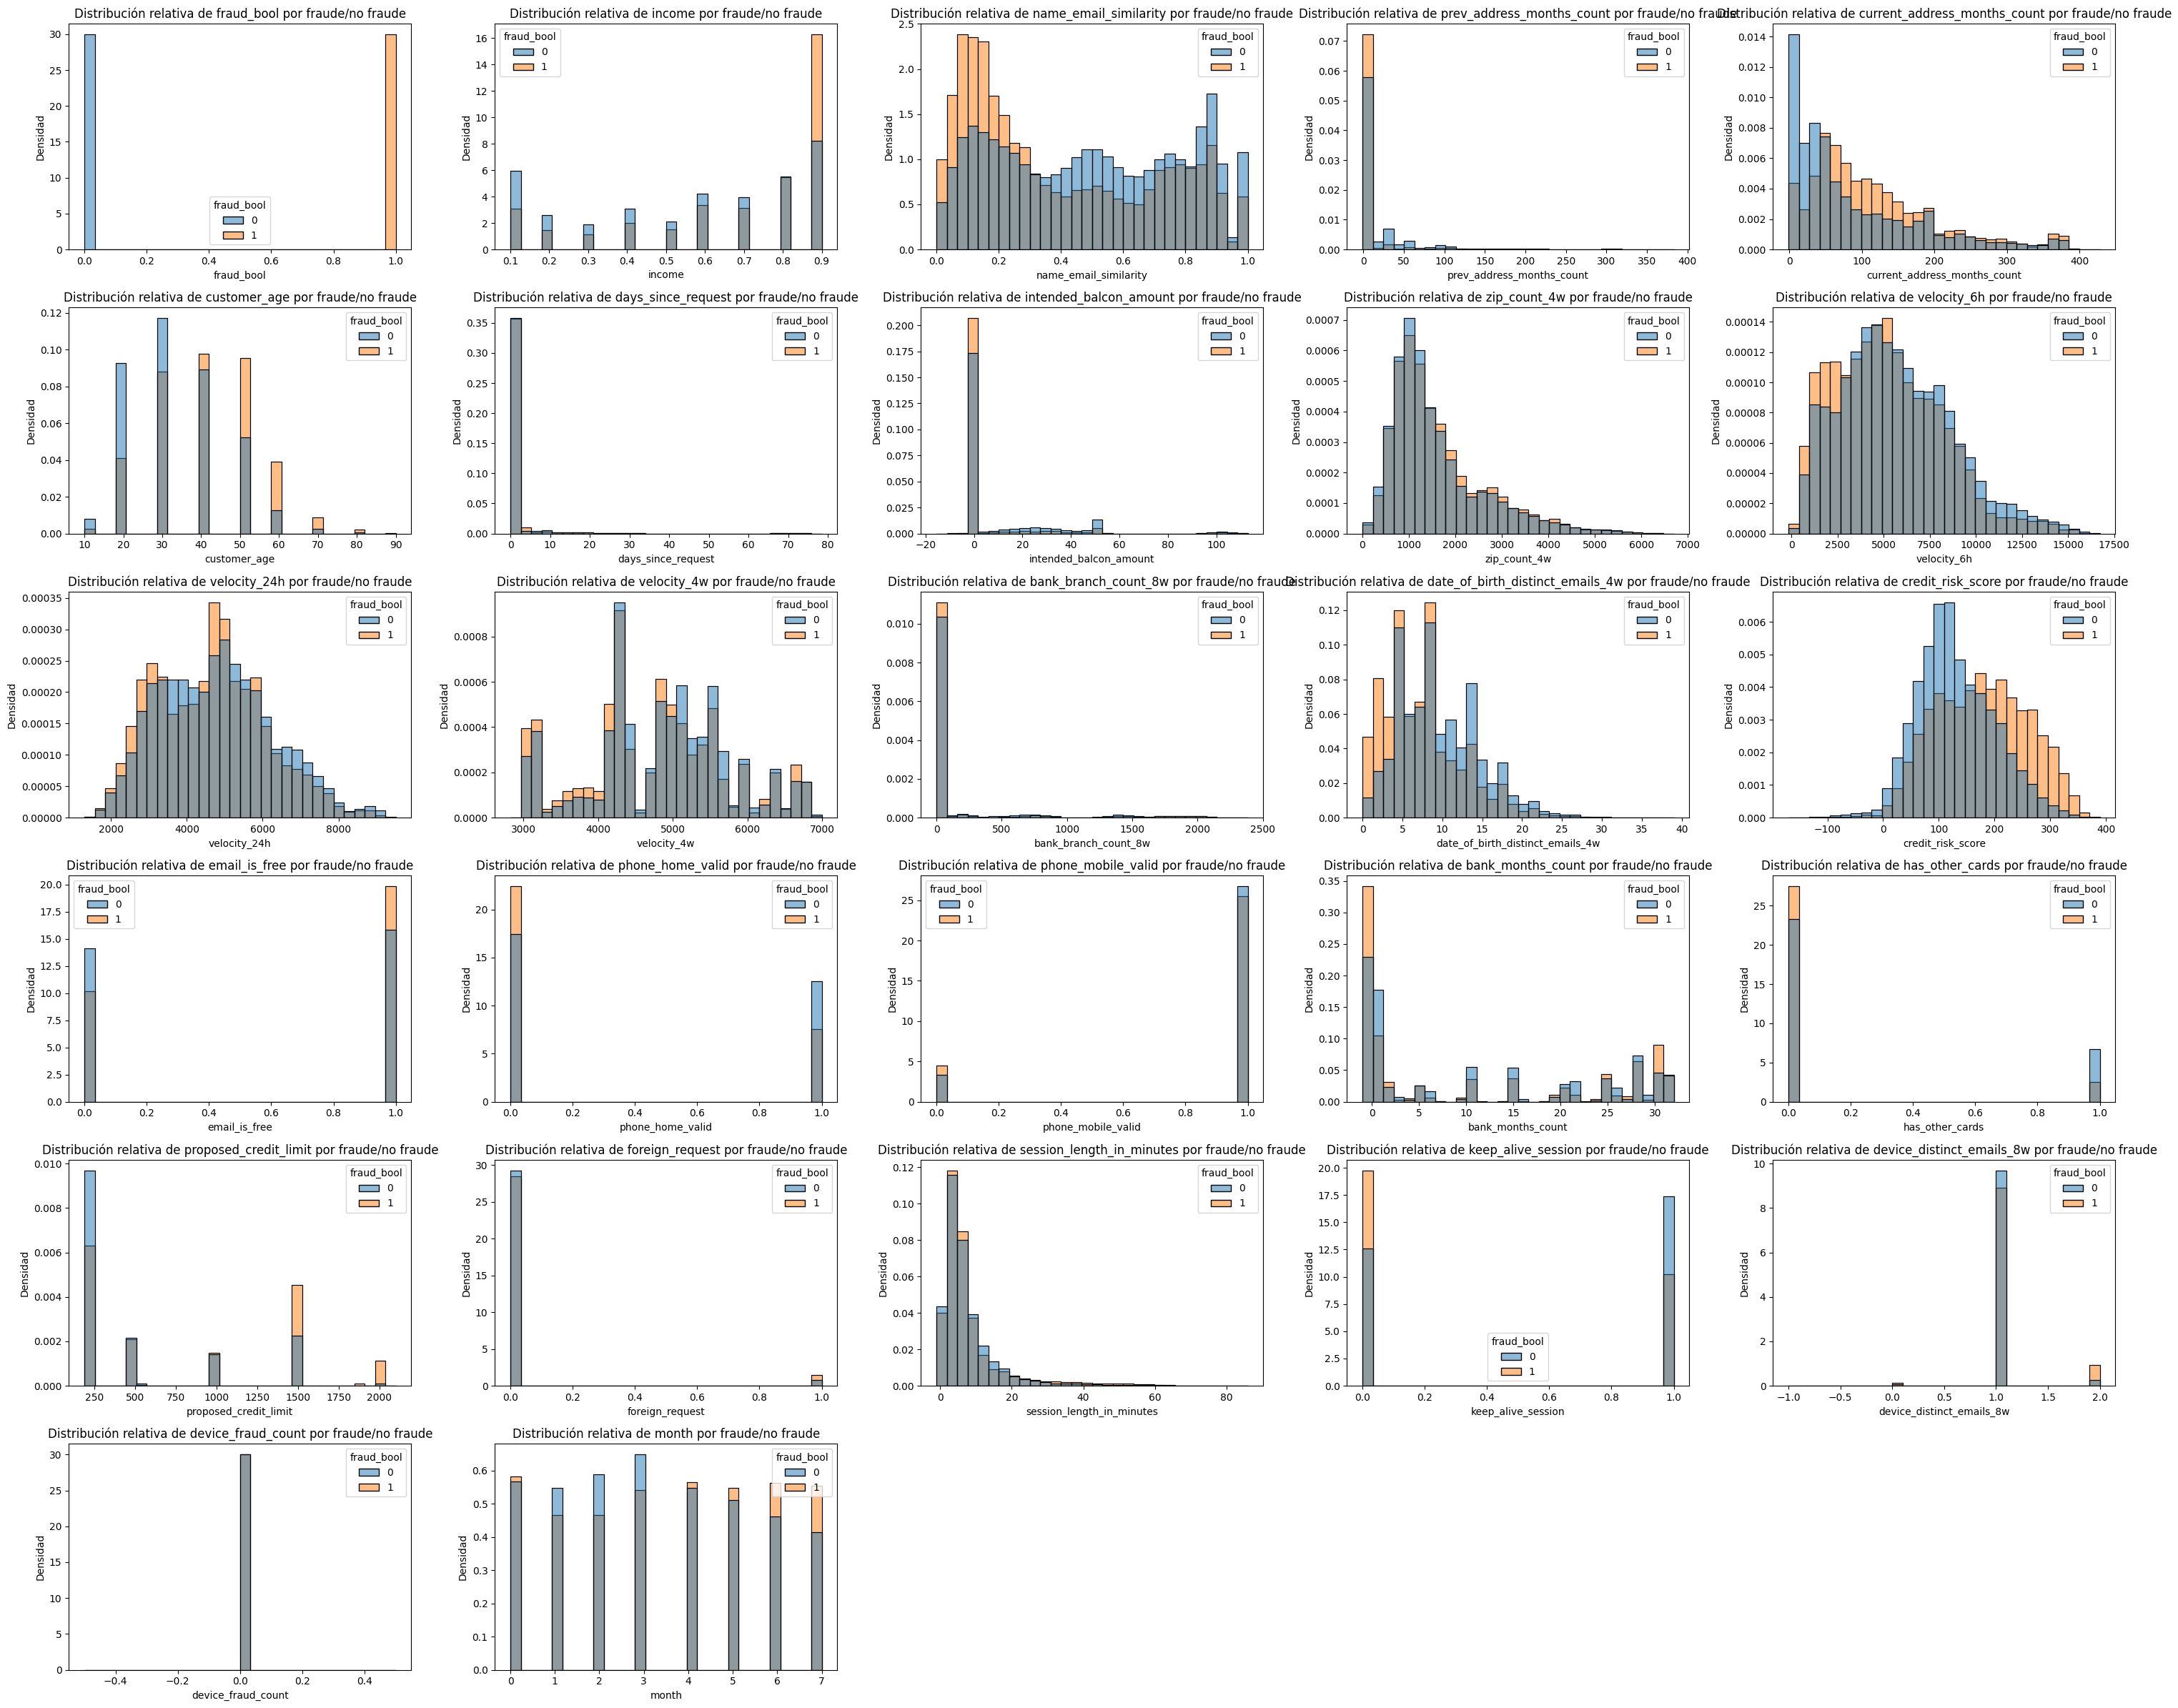

In [99]:
columnas_numericas = data.select_dtypes(include=['number']).columns

n_cols = 5
n_rows = (len(columnas_numericas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    sns.histplot(
        data=data,
        x=col,
        hue="fraud_bool",
        bins=30,
        stat="density",      
        common_norm=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribución relativa de {col} por fraude/no fraude")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Densidad")


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("distribuciones_relativas.png", dpi=300, bbox_inches='tight')
plt.show()


- La variable prev_address__months_count tienen una distribución pegado al valor -1 lo cual nos podría
decir que el modelo no aprendera con la información de prev_address_month

- La variable days_since_request no agrega información para los casos 

- La variable intended_balcon no agrega mucha información 

In [102]:
data.describe()

,fraud_bool,income,name_email_similarity,customer_age,velocity_24h,velocity_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,previo_docimicilio_registrado,log_session_length_in_minutes
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.011029,0.562696,0.493694,33.689080,4769.781965,4856.324016,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,0.287080,2.041034
std,0.104438,0.290343,0.289125,12.025799,1479.212612,919.843934,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.452399,0.611665
min,0.000000,0.100000,0.000001,10.000000,1300.307314,2825.748405,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.300000,0.225216,20.000000,3593.179135,4268.368423,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,0.000000,1.629839
50%,0.000000,0.600000,0.492153,30.000000,4749.921161,4913.436941,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,0.000000,1.962110
75%,0.000000,0.800000,0.755567,40.000000,5752.574191,5488.083356,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,2.385651
max,1.000000,0.900000,0.999999,90.000000,9506.896596,6994.764201,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,1.000000,4.476190


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   fraud_bool                     1000000 non-null  int64  
 1   income                         1000000 non-null  float64
 2   name_email_similarity          1000000 non-null  float64
 3   customer_age                   1000000 non-null  int64  
 4   payment_type                   1000000 non-null  object 
 5   velocity_24h                   1000000 non-null  float64
 6   velocity_4w                    1000000 non-null  float64
 7   employment_status              1000000 non-null  object 
 8   credit_risk_score              1000000 non-null  int64  
 9   email_is_free                  1000000 non-null  int64  
 10  housing_status                 1000000 non-null  object 
 11  phone_home_valid               1000000 non-null  int64  
 12  phone_mobile_va

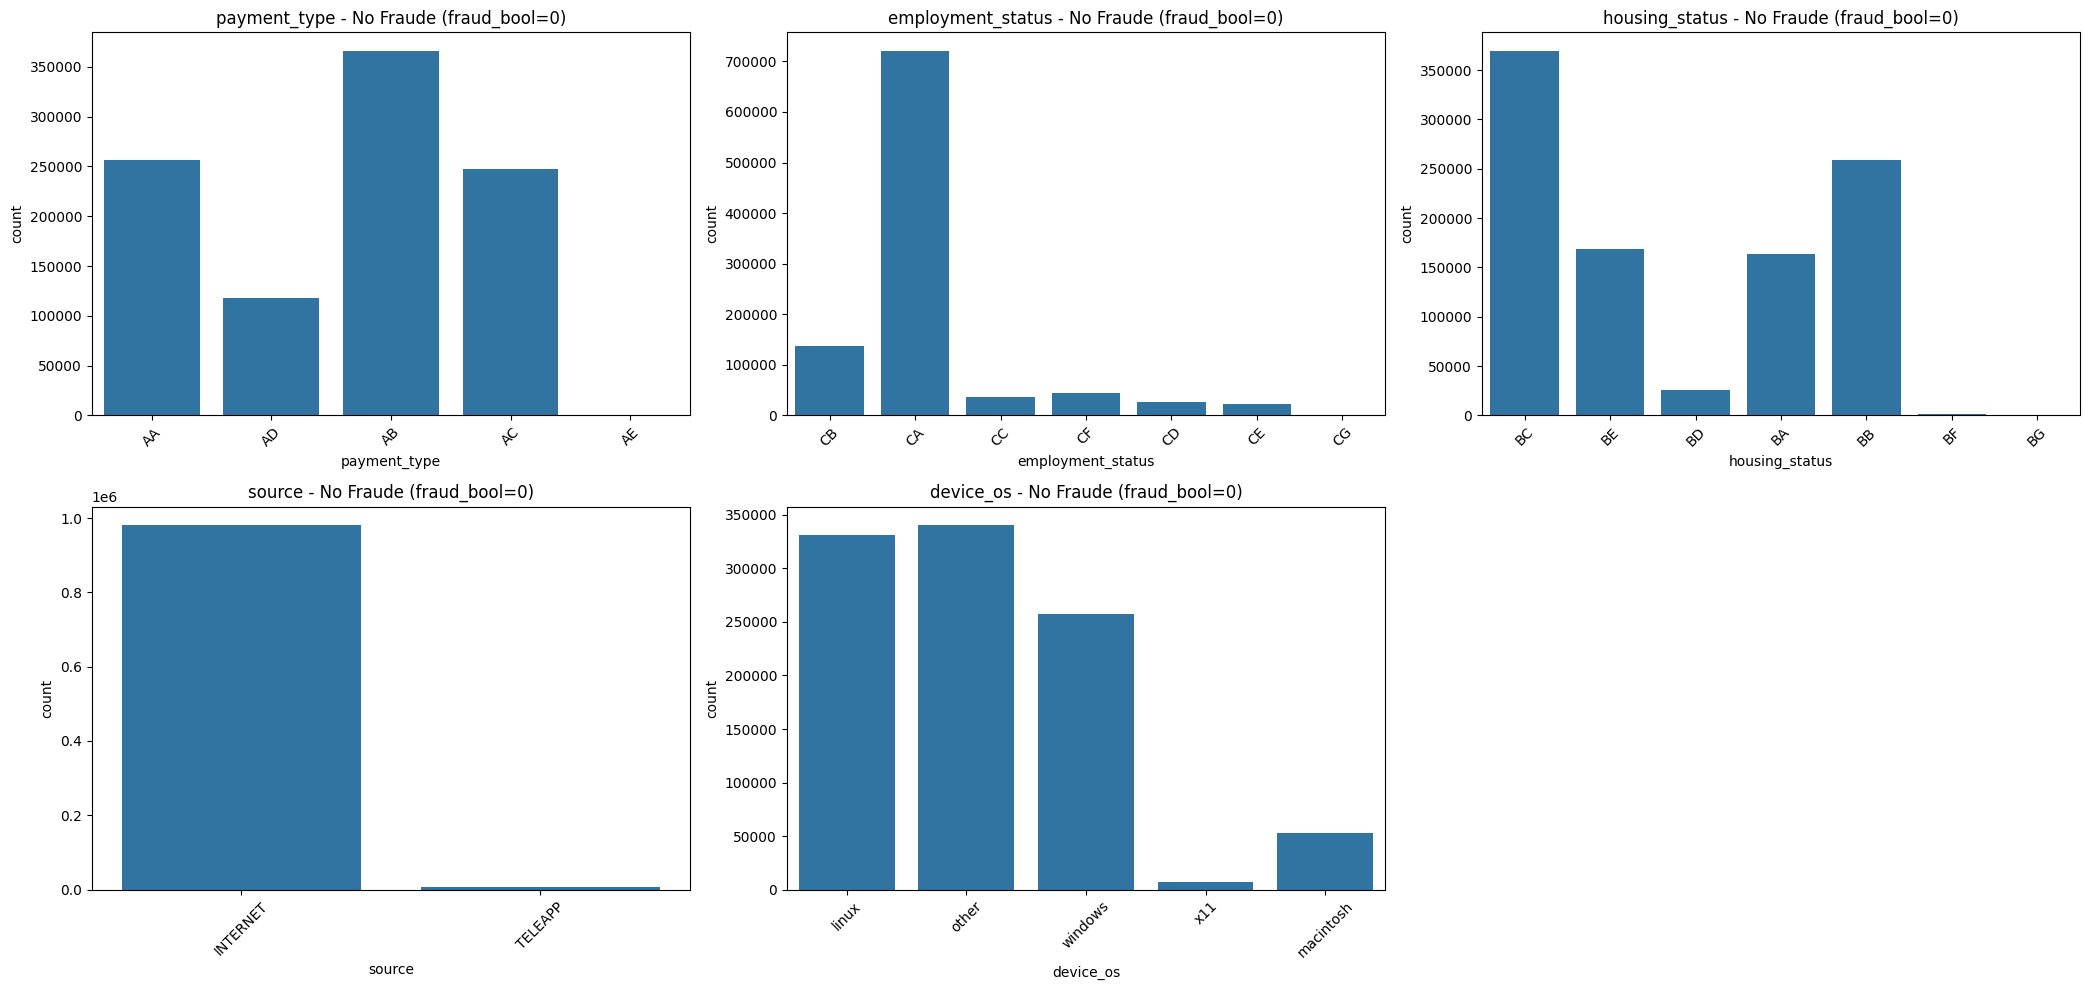

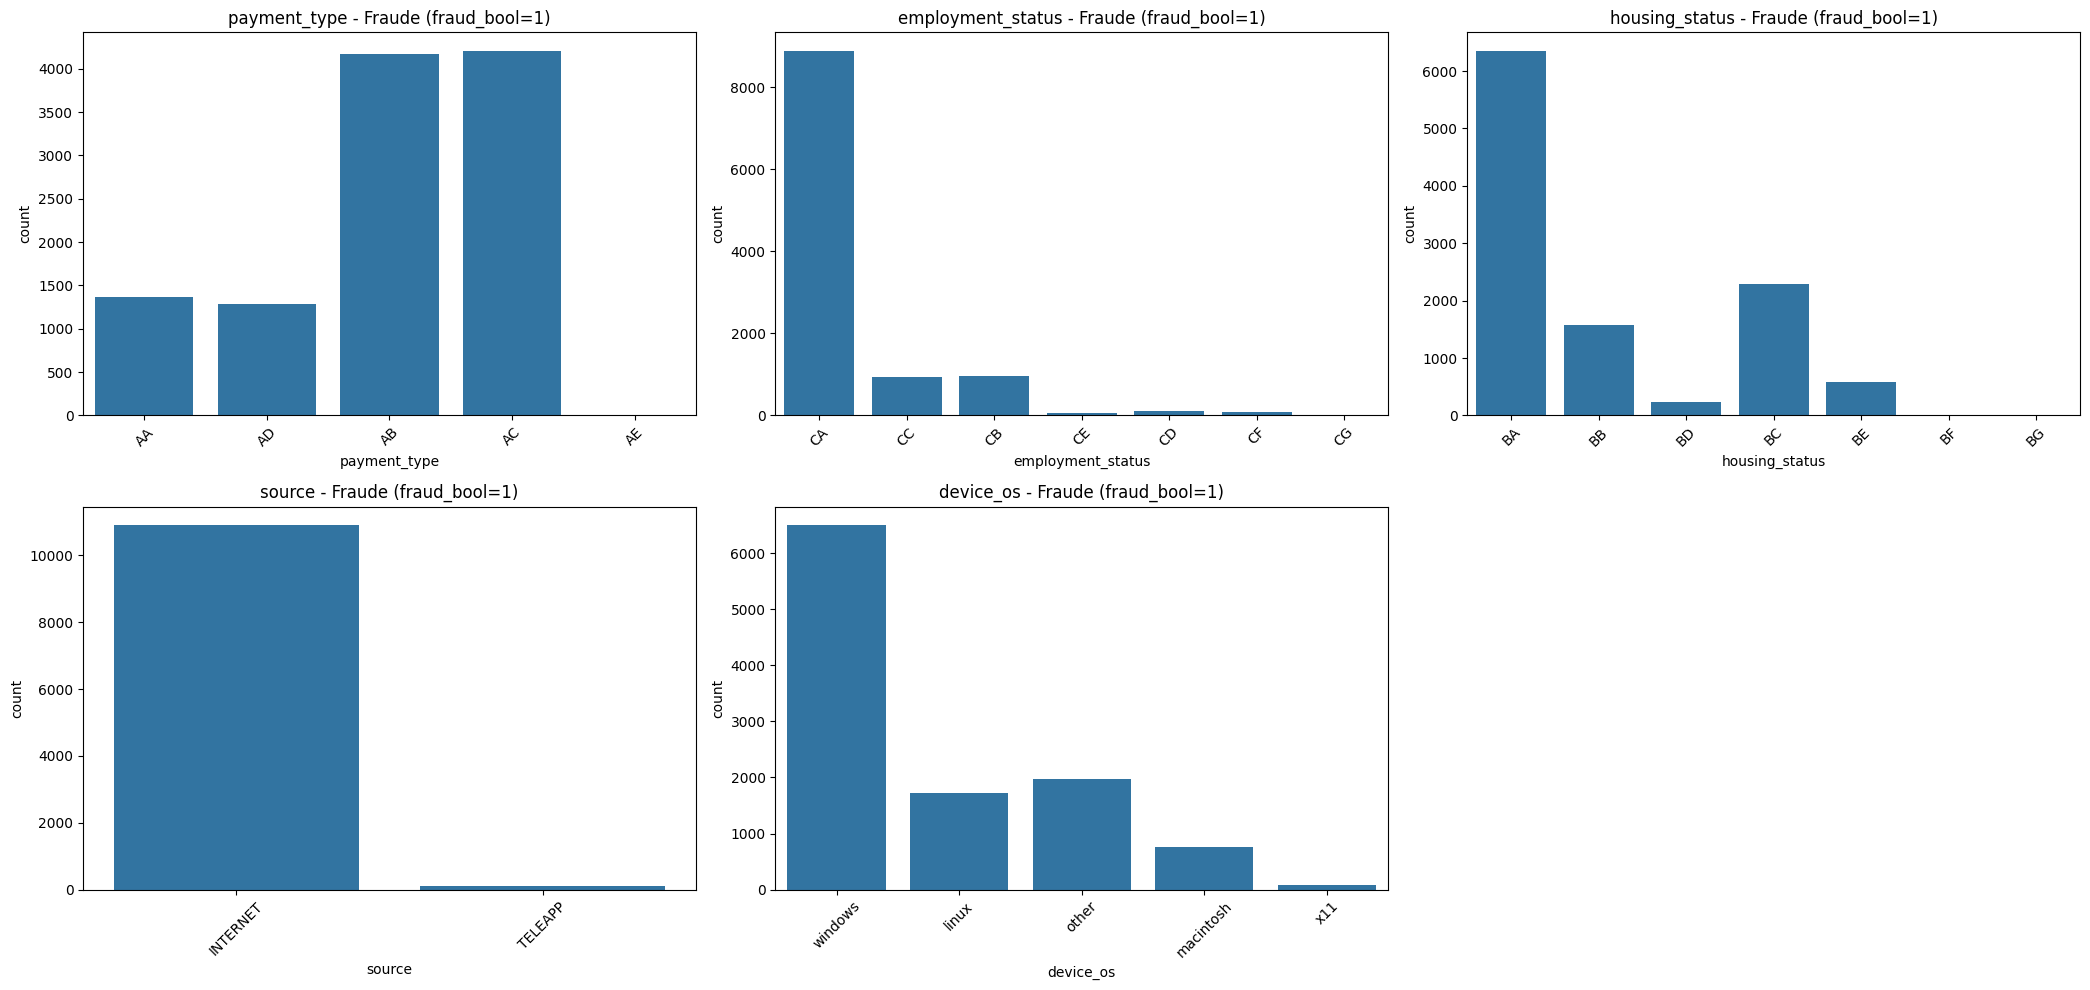

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object', 'category', 'bool']).columns

# Parámetros de la grilla
n_cols = 3
n_rows = (len(columnas_categoricas) + n_cols - 1) // n_cols

# ---------------- NO FRAUDE ----------------
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*5))
axes = axes.flatten()

for i, col in enumerate(columnas_categoricas):
    sns.countplot(x=col, data=data[data["fraud_bool"] == 0], ax=axes[i])
    axes[i].set_title(f"{col} - No Fraude (fraud_bool=0)")
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("categoricas_no_fraude.png", dpi=300, bbox_inches='tight')
plt.show()

# ---------------- FRAUDE ----------------
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*5))
axes = axes.flatten()

for i, col in enumerate(columnas_categoricas):
    sns.countplot(x=col, data=data[data["fraud_bool"] == 1], ax=axes[i])
    axes[i].set_title(f"{col} - Fraude (fraud_bool=1)")
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("categoricas_fraude.png", dpi=300, bbox_inches='tight')
plt.show()


In [105]:
import numpy as np
def preprocess_data(data: pd.DataFrame) -> pd.DataFrame:

    # Nueva variable binaria basada en prev_address_months_count
    data["previo_docimicilio_registrado"] = (data["prev_address_months_count"] >= 0).astype(int)

    # Eliminar columnas irrelevantes
    cols_to_drop = [
        "device_fraud_count", "month", "days_since_request", "bank_branch_count_8w",
        "intended_balcon_amount", "prev_address_months_count", "device_distinct_emails_8w",
        "current_address_months_count", "zip_count_4w", "velocity_6h",
        "date_of_birth_distinct_emails_4w", "source"
    ]
    data = data.drop(columns=cols_to_drop, errors="ignore")

    # Crear variable logarítmica transformada
    data["log_session_length_in_minutes"] = np.log1p(data["session_length_in_minutes"] + 1)

    return data

data = preprocess_data(data)

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = ["payment_type","employment_status","housing_status","device_os"]
numeric_cols = [col for col in data.columns if col not in categorical_cols + ["fraud_bool"]]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)


In [107]:
X = data.drop("fraud_bool", axis=1)
y = data["fraud_bool"]
X_transformed = preprocessor.fit_transform(X)

print("dimension de los datos transformados con one hot encoding:", X_transformed.shape)
print("dimension de la variable antes de hacer one hot encoding:", X.shape)

dimension de los datos transformados con one hot encoding: (1000000, 37)
dimension de la variable antes de hacer one hot encoding: (1000000, 21)


In [108]:
from scipy import stats
import numpy as np
import pandas as pd

z_scores = np.abs(stats.zscore(X[numeric_cols]))

outliers = (z_scores > 3)

outlier_counts = outliers.sum(axis=0)

print("Aqui c detectados por variable:\n", pd.Series(outlier_counts, index=numeric_cols))


Aqui c detectados por variable:
 income                               0
name_email_similarity                0
customer_age                      7890
velocity_24h                       539
velocity_4w                          0
credit_risk_score                 3471
email_is_free                        0
phone_home_valid                     0
phone_mobile_valid                   0
bank_months_count                    0
has_other_cards                      0
proposed_credit_limit             6155
foreign_request                  25242
session_length_in_minutes        23593
keep_alive_session                   0
previo_docimicilio_registrado        0
log_session_length_in_minutes    10933
dtype: int64


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (800000, 21) (800000,)
Test: (200000, 21) (200000,)


In [110]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print("Dim Train prep:", X_train_prep.shape)
print("Dim Test prep:", X_test_prep.shape)


Dim Train prep: (800000, 37)
Dim Test prep: (200000, 37)


In [111]:
ohe = preprocessor.named_transformers_["cat"]
cat_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numeric_cols, cat_names])

In [112]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train_prep, y_train)

# print("Tamaño Train antes SMOTE:", X_train_prep.shape, "Distribución:", y_train.value_counts())
# print("Tamaño Train después SMOTE:", X_train_res.shape, "Distribución:", pd.Series(y_train_res).value_counts())



In [113]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd


rus = RandomUnderSampler(random_state=42)


X_train_res, y_train_res = rus.fit_resample(X_train_prep, y_train)

print("Tamaño Train antes undersampling:", X_train_prep.shape, 
      "Distribución:", y_train.value_counts())
print("Tamaño Train después undersampling:", X_train_res.shape, 
      "Distribución:", pd.Series(y_train_res).value_counts())


Tamaño Train antes undersampling: (800000, 37) Distribución: fraud_bool
0    791177
1      8823
Name: count, dtype: int64
Tamaño Train después undersampling: (17646, 37) Distribución: fraud_bool
0    8823
1    8823
Name: count, dtype: int64


In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_res, y_train_res)


feat_importances = pd.Series(rf.feature_importances_, index=all_feature_names).sort_values(ascending=False)

print("\nTop 20 por random forest")
print(feat_importances.head(20))


# perm_importance = permutation_importance(
#     rf, X_test_prep, y_test,
#     n_repeats=5, random_state=42, n_jobs=-1
# )

# perm_feat_importances = pd.Series(
#     perm_importance.importances_mean,
#     index=all_feature_names
# ).sort_values(ascending=False)

# print("\nTop 20 de importancia por permutacion")
# print(perm_feat_importances.head(20))



Top 20 por random forest
employment_status_CF         0.100616
employment_status_CB         0.089828
employment_status_CE         0.071043
employment_status_CD         0.067675
payment_type_AC              0.066253
device_os_x11                0.062807
device_os_macintosh          0.062675
payment_type_AE              0.053504
employment_status_CC         0.049735
device_os_windows            0.042435
housing_status_BD            0.042227
housing_status_BF            0.039188
device_os_other              0.034999
housing_status_BE            0.026894
housing_status_BB            0.024992
session_length_in_minutes    0.020768
proposed_credit_limit        0.020121
has_other_cards              0.018926
employment_status_CG         0.016178
payment_type_AB              0.013138
dtype: float64


In [115]:
#selected_perm = perm_feat_importances[perm_feat_importances > 0].index.tolist()

selected_rf = feat_importances.head(30).index.tolist()

#selected_features = list(set(selected_perm + selected_rf))
selected_features = list(set(selected_rf))
print("num de features seleccionadas:", len(selected_features))
print("Lista final:\n", selected_features)

X_train_sel = pd.DataFrame(X_train_res, columns=all_feature_names)[selected_features]
X_test_sel  = pd.DataFrame(X_test_prep,  columns=all_feature_names)[selected_features]


num de features seleccionadas: 30
Lista final:
 ['employment_status_CC', 'phone_mobile_valid', 'employment_status_CF', 'housing_status_BB', 'device_os_macintosh', 'employment_status_CE', 'housing_status_BF', 'device_os_x11', 'payment_type_AE', 'device_os_windows', 'housing_status_BC', 'payment_type_AB', 'employment_status_CB', 'proposed_credit_limit', 'employment_status_CG', 'log_session_length_in_minutes', 'employment_status_CD', 'foreign_request', 'payment_type_AC', 'has_other_cards', 'customer_age', 'name_email_similarity', 'housing_status_BD', 'velocity_4w', 'income', 'credit_risk_score', 'housing_status_BE', 'housing_status_BG', 'session_length_in_minutes', 'device_os_other']


In [116]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from collections import Counter

print("Train balanceado:", Counter(y_train_res))
print("Test real:", Counter(y_test))


rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=20,
    n_jobs=-1,
    max_depth=100
)

# gb = GradientBoostingClassifier(
#     n_estimators=100,
#     learning_rate=0.01,
#     max_depth=3,
#     random_state=42
# )

# knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# voting = VotingClassifier(
#     estimators=[("rf", rf), ("gb", gb), ("knn", knn)],
#     voting="soft",  
#     n_jobs=-1
# )

models = {
    "random Forest": rf,
    #"gradient Boosting": gb,
    #"KNN": knn,
    #"voting Ensemble": voting
}


for name, model in models.items():
    model.fit(X_train_sel, y_train_res)
    y_pred = model.predict(X_test_sel)
    y_proba = model.predict_proba(X_test_sel)[:, 1]

    print(f"\Modelo {name}")
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Train balanceado: Counter({0: 8823, 1: 8823})
Test real: Counter({0: 197794, 1: 2206})


<>:46: SyntaxWarning: invalid escape sequence '\M'
<>:46: SyntaxWarning: invalid escape sequence '\M'
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_11496\1065623914.py:46: SyntaxWarning: invalid escape sequence '\M'
  print(f"\Modelo {name}")


\Modelo random Forest
              precision    recall  f1-score   support

           0     0.9971    0.7985    0.8868    197794
           1     0.0421    0.7937    0.0799      2206

    accuracy                         0.7984    200000
   macro avg     0.5196    0.7961    0.4834    200000
weighted avg     0.9866    0.7984    0.8779    200000

ROC-AUC: 0.87275124565022


In [117]:
from sklearn.model_selection import GridSearchCV

# los hiperparámetros a explorar
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [20, 50, 100, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Crear el modelo base
rf = RandomForestClassifier(
    class_weight="balanced",  # mantener balanceo
    random_state=20,
    n_jobs=-1
)

# Definir GridSearch con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  # validación cruzada (5 folds)
    scoring="roc_auc",     # métrica principal
    n_jobs=-1,             # usar todos los núcleos
    verbose=2
)

# Entrenar con los datos balanceados de entrenamiento
grid_search.fit(X_train_sel, y_train_res)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor ROC-AUC en CV:", grid_search.best_score_)

# Predecir en test real
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_sel)
y_proba = best_rf.predict_proba(X_test_sel)[:, 1]

print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC en test:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores parámetros: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Mejor ROC-AUC en CV: 0.8719560680047552
              precision    recall  f1-score   support

           0     0.9972    0.7994    0.8874    197794
           1     0.0424    0.7956    0.0804      2206

    accuracy                         0.7994    200000
   macro avg     0.5198    0.7975    0.4839    200000
weighted avg     0.9866    0.7994    0.8785    200000

ROC-AUC en test: 0.8770527426123012
